# MBTI Project 

## Exploratory Data Analysis

### Imports
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.transforms
from matplotlib.patches import Patch
import seaborn as sns
import re
from scipy import stats

%matplotlib inline
sns.set(rc={'axes.facecolor':'white'})

In [3]:
df = pd.read_csv('../../data/mbti_interim.csv', index_col=0)

<br>


### Let's start by checking the state of our dataset after data-wrangling
***

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
I,8675.0,0.769568,0.421134,0.0,1.00,1.000000,1.00,1.000000
J,8675.0,0.395850,0.489061,0.0,0.00,0.000000,1.00,1.000000
N,8675.0,0.862017,0.344902,0.0,1.00,1.000000,1.00,1.000000
T,8675.0,0.458905,0.498337,0.0,0.00,0.000000,1.00,1.000000
NF,8675.0,0.480346,0.499642,0.0,0.00,0.000000,1.00,1.000000
...,...,...,...,...,...,...,...,...
avg_third_person,8675.0,0.415968,0.252414,0.0,0.24,0.361702,0.54,3.120000
positive_words,8675.0,39.527608,13.471651,0.0,30.00,40.000000,49.00,111.000000
avg_positive_words,8675.0,0.810456,0.262999,0.0,0.64,0.800000,0.98,2.220000
negative_words,8675.0,27.081960,10.352061,0.0,20.00,27.000000,34.00,78.000000


In [5]:
df.head()

,type,posts,I,J,N,T,NF,NT,SP,SJ,...,them_count,their_count,theirs_count,themselves_count,total_third_person,avg_third_person,positive_words,avg_positive_words,negative_words,avg_negative_words
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,1,0,1,0,0,0,...,1,2,0,0,7,0.14,19,0.38,9,0.18
1,ENTP,'I'm finding the lack of me in these posts ver...,0,0,1,1,0,1,0,0,...,5,4,0,1,20,0.40,38,0.76,24,0.48
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,0,1,1,0,1,0,0,...,2,0,0,0,3,0.06,35,0.70,18,0.36
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1,0,1,0,0,...,2,2,0,0,15,0.30,23,0.46,19,0.38
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1,0,1,0,0,...,2,6,0,1,37,0.74,33,0.66,29,0.58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 8674
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    8675 non-null   object 
 1   posts                   8675 non-null   object 
 2   I                       8675 non-null   int64  
 3   J                       8675 non-null   int64  
 4   N                       8675 non-null   int64  
 5   T                       8675 non-null   int64  
 6   NF                      8675 non-null   int64  
 7   NT                      8675 non-null   int64  
 8   SP                      8675 non-null   int64  
 9   SJ                      8675 non-null   int64  
 10  posts_len               8675 non-null   int64  
 11  posts_separated         8675 non-null   object 
 12  count_posts             8675 non-null   int64  
 13  avg_num_char_x_post     8675 non-null   float64
 14  num_of_links            8675 non-null   

<br>

**We can make some adjustments to this dataset by converting the keirsey temperaments from booleans to 1s and 0s**

In [ ]:
keirsey = ['NF','NT','SP','SJ']
for i in keirsey:
    df[i] = df[i].astype(int)

<br>

**For the time being we will drop the "text" columns, we might use them later for other analysis.**

In [ ]:
df_text = df[['type','posts','posts_separated','posts_clean']]

In [ ]:
df_text.head() # 

In [ ]:
df.drop(['posts','posts_separated','posts_clean'], axis=1, inplace= True)

In [10]:
df.head()

,type,I,J,N,T,NF,NT,SP,SJ,posts_len,...,ESFJ_mentions,Total_Mentions,:D_count,;D_count,:)_count,;)_count,:(_count,xD_count,XD_count,Total_Emojis
0,INFJ,1,1,1,0,1,0,0,0,4652,...,0,8,0,0,0,0,0,0,0,0
1,ENTP,0,0,1,1,0,1,0,0,7053,...,0,19,9,3,5,0,0,0,0,17
2,INTP,1,0,1,1,0,1,0,0,5265,...,0,4,2,0,7,0,0,0,0,9
3,INTJ,1,1,1,1,0,1,0,0,6271,...,3,12,0,0,0,0,0,0,0,0
4,ENTJ,0,1,1,1,0,1,0,0,6111,...,0,5,0,0,0,1,0,0,1,2


<br>


### Column Renaming and new features

***

In [11]:
mention_columns = df.iloc[:,13:29].columns.values

In [12]:
new_columns = dict(zip(mention_columns, [re.sub(r'_.*$','',x) for x in mention_columns]))

In [13]:
df=df.rename(columns = new_columns)

In [14]:
mentions_others = []
for e,i in enumerate(df['type']):
    result = df.drop(i, axis=1).iloc[e,13:28].sum()
    mentions_others.append(result) 

In [15]:
df.insert(loc=30, column='mentions_others', value=mentions_others)

In [16]:
df.insert(loc=31, column='self_mentions', value=(df['Total_Mentions']-df['mentions_others'])) 

In [17]:
keirsey = []

for i in df['type']:
    if re.search(r'.NF.',i):
        keirsey.append('NF')

    elif re.search(r'.NT.',i):
        keirsey.append('NT')

    elif re.search(r'.S.P',i):
        keirsey.append('SP')

    else:
        keirsey.append('SJ')


In [18]:
df['keirsey'] = keirsey

In [19]:
# Let's check to see if our code worked well
df.iloc[:,29:32].head()

,Total_Mentions,mentions_others,self_mentions
0,8,6,2
1,19,9,10
2,4,3,1
3,12,10,2
4,5,1,4


In [20]:
# We create this global variable since we will need to refer to it several times
mbti_types = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

<br>


### Colors
***

We create lists of HEX, RGB, and % RGB colors to keep a homogeneous look across visualizations

In [21]:
colors_types = {'INFP':'#AD3139','INFJ':'#C64D43','INTP':'#D66C54','INTJ':'#E28C64','ENTP':'#E9AB72','ENFP':'#EEC58A','ISTP' : '#F2DDA3','ISFP' : '#F5EEBA','ENTJ' : '#F2F6D4','ISTJ' : '#E6F2F0','ENFJ' : '#CCE4EC','ISFJ' : '#B0D3DF','ESTP' : '#91BACF','ESFP' : '#769EBE','ESFJ' : '#5C80AC','ESTJ' : '#4A619A'}
colors_main = {'I':'#a50026','E':'#d73027','S':'#f46d43','N':'#fdae61','T':'#fee090','F':'#ffffbf','P':'#e0f3f8','J':'#abd9e9'}
colors_keirsey = {'NF':'#a50026', 'NT':'#fdae61' ,'SP':'#abd9e9', 'SJ':'#313695'}

In [22]:
def hex_rgb_converter(dictionary, dictionary_name):
    dictionary_name = {}
    for k, v in dictionary.items():
        v = v.lstrip('#')  
        result = tuple(int(v[i:i+2], 16) for i in (0, 2, 4))
        dictionary_name[k] = result
    return dictionary_name

In [23]:
colors_main_rgb = hex_rgb_converter(colors_main, 'colors_main_rgb')
colors_types_rgb = hex_rgb_converter(colors_types, 'colors_type_rgb')
colors_keirsey_rgb = hex_rgb_converter(colors_keirsey, 'colors_keirsey_rgb')

In [24]:
def rgb_pct_converter(dictionary, dictionary_name):
        dictionary_name = {}
        for k, v in dictionary.items():
            result = [x/255 for x in v]
            result.append(1.0)
            dictionary_name[k] = result
        return dictionary_name

In [25]:
colors_main_rgb_pct = rgb_pct_converter(colors_main_rgb, 'colors_main_rgb_pct')
colors_types_rgb_pct = rgb_pct_converter(colors_types_rgb, 'colors_types_rgb_pct')
colors_keirsey_rgb_pct = rgb_pct_converter(colors_keirsey_rgb, 'colors_keirsey_rgb_pct')

<br>

### Visualizing the Categorical Data

***

In [26]:
df_cat = df.select_dtypes(include='object').copy()
df_cat.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [27]:
# Let's first save the order of the previous visualization to avoid mismatching mbti types
sorter = df_cat['type'].value_counts().index.to_list()

In [28]:
# We import another dataset we created for this purpose
df_global = pd.read_csv('../../data/16personalities.csv')

In [29]:
# Let's check how it looks like
df_global.head()

,code,percentage
0,enfj,0.074567
1,enfp,0.144600
2,entj,0.024050
3,entp,0.044300
4,esfj,0.090000


In [30]:
# We convert the code (which is the MBTI type) to uppercase letters
df_global['code'] = df_global['code'].apply(lambda x:x.upper())

In [31]:
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter,range(len(sorter))))

# Generate a rank column that will be used to sort the dataframe numerically
df_global['Rank'] = df_global['code'].map(sorterIndex)

# Sort the dataframe
df_global.sort_values('Rank', ascending = True, inplace = True)

In [32]:
# We can look at the new dataframe with the ranking column
df_global

,code,percentage,Rank
9,INFP,0.156667,0
8,INFJ,0.079200,1
11,INTP,0.055067,2
10,INTJ,0.031433,3
3,ENTP,0.044300,4
1,ENFP,0.144600,5
15,ISTP,0.020900,6
13,ISFP,0.054967,7
2,ENTJ,0.024050,8
14,ISTJ,0.031450,9


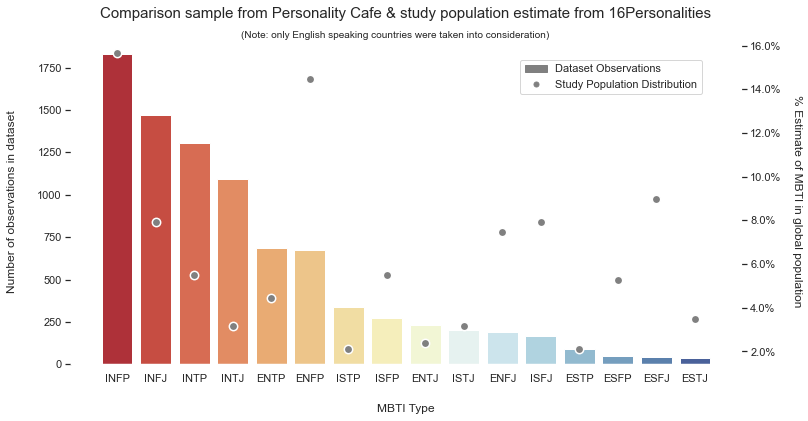

In [33]:
fig, ax = plt.subplots(figsize=(12,6))

# Countplot
sns.countplot(x='type', data=df_cat, order= df_cat['type'].value_counts().index, palette='RdYlBu', ax=ax)
plt.ylabel('Number of observations in dataset', labelpad=20)
plt.xlabel('MBTI Type',labelpad=20)

# Scatterplot Data
x = df_global['code'].to_list()
y = np.array(df_global['percentage']*100)

# Scatterplot
ax2 = ax.twinx()
sns.scatterplot(x, y, ax=ax2,  s=70, facecolors='grey', edgecolors='b', linewidth=1.5)
ax2.set_xticklabels(x)
ax2.grid(False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel('% Estimate of MBTI in global population', rotation=270, labelpad=20)

# Legend
bars = Patch(color='gray', label='Dataset Observations')
dots = matplotlib.lines.Line2D([], [], color='gray', marker='o', linestyle='None', markersize=5, label='Study Population Distribution')
plt.legend(handles=[bars, dots], loc='best', bbox_to_anchor=(0.45, 0.45, 0.5, 0.5))

plt.title('Comparison sample from Personality Cafe & study population estimate from 16Personalities',size=15,pad=20)
plt.figtext(.5,.88,'(Note: only English speaking countries were taken into consideration)',fontsize=10,ha='center')
plt.savefig('Figures/countplot_types_comparison_population.png', dpi=300)

plt.show()

<br>

**We can see that there are quite a lot more cases of Intuition (N) than Sensing (S) and in the first category, Introversion (I) has more cases than Extraversion (E). We can see there is quite a big difference between our data an the target population... this is something to consider later on.**

<br>

### Heatmaps
***

There are many variables in our dataset that are similar amongst them. We will focus on 5 variables:
- Number of posts per person
- Average number of characters per post
- Number of links
- How many times the reference their own MBTI type (self mentions)
- Total number of emojis they use

In [34]:
df_heatmap = df.set_index('type')

In [35]:
df_heatmap = df_heatmap.drop('keirsey', axis=1)

In [36]:
# We standardize the columns 
df_norm_col=(df_heatmap-df_heatmap.mean())/df_heatmap.std()

In [39]:
# There are fields that really do not add a lot of value because they are clearly correlated with the target label, we will drop them to keep the range in place
drop = ['I','J','N','T','NT','NF','SP','SJ', 'ENFJ','ENFP','ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ',  'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP','posts_len','XD_count',':D_count','xD_count',':(_count',':)_count',';)_count',';D_count', 'mentions_others','Total_Mentions']

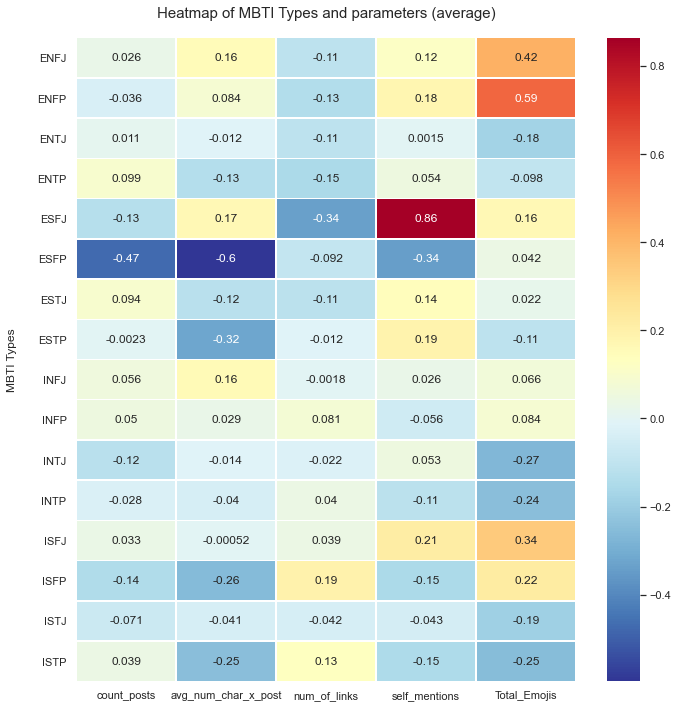

In [40]:
plt.figure(figsize=(10,10))
           
ax = sns.heatmap(df_norm_col.drop(drop, axis=1).groupby('type').mean(), cmap='RdYlBu_r', linewidths=0.5, annot=True)

plt.ylabel('MBTI Types', labelpad=20)
plt.yticks(rotation = 0)
plt.title('Heatmap of MBTI Types and parameters (average)', size=15, pad=20)

plt.tight_layout()
plt.savefig('Figures/Heatmap_target.png', dpi=300)

plt.show()

<br>

### Posts_Count
***

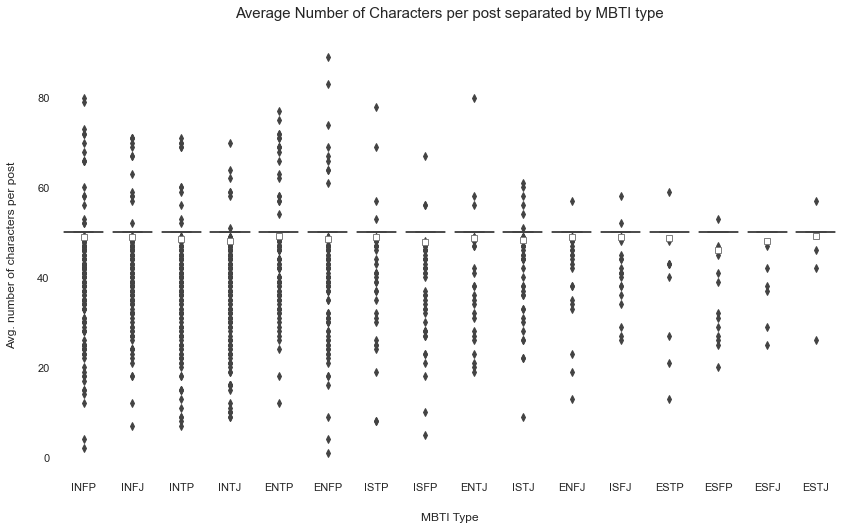

In [41]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='count_posts', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="avg_num_char_x_post", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Average Number of Characters per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. number of characters per post', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Characters_types.png', dpi=300)

plt.show()

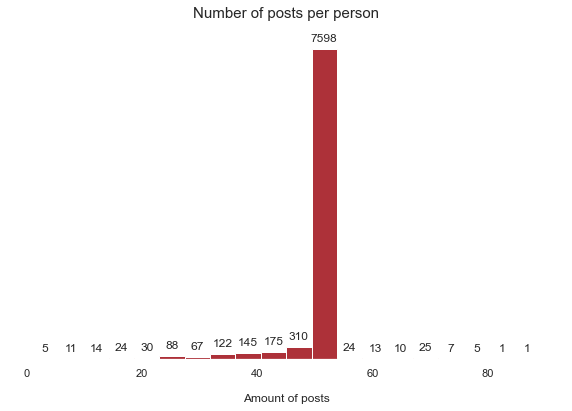

In [264]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.count_posts, density=False, bins=20)
ax.axes.get_yaxis().set_visible(False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    
plt.title('Number of posts per person', size=15, pad=15)
plt.xlabel('Amount of posts', labelpad=15)

plt.show()

<br>

### Avg. Number of characters per post
***

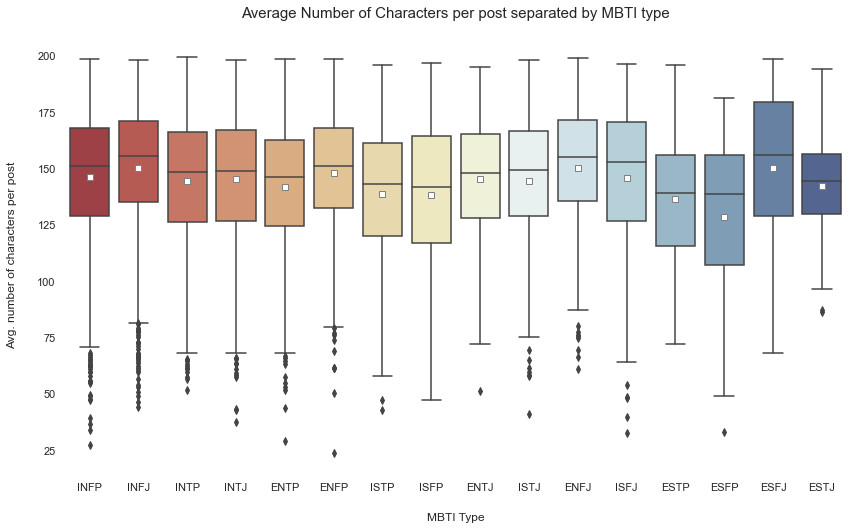

In [42]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='avg_num_char_x_post', data=df, order=sorter, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="avg_num_char_x_post", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Average Number of Characters per post separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Avg. number of characters per post', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Characters_types.png', dpi=300)

plt.show()

**Test for Normality**

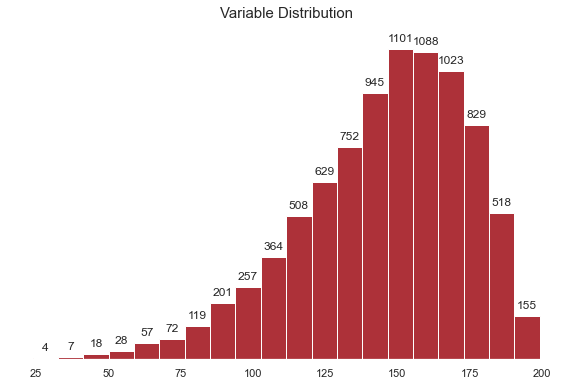

In [407]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.avg_num_char_x_post, density=False, bins=20)
ax.axes.get_yaxis().set_visible(False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

**Kruskal-Wallis Test by Ranks**

In [305]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['avg_num_char_x_post']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 135.6341838645423
P-Value: 1.6673085613521744e-21
Reject NULL hypothesis - Significant differences exist between groups.


https://stats.stackexchange.com/questions/79289/why-is-statistically-significant-not-enough/79304#79304

**Post hoc Dunn's Adjustment**

In [375]:
import scikit_posthocs as sp
dunn = sp.posthoc_dunn(list_array, p_adjust='bonferroni', sort=False)

In [376]:
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')

In [377]:
def color_dunn(val):
    if val < 0.05 and val != -1:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [378]:
#dunn = dunn.mask(np.triu(np.ones(dunn.shape, dtype=np.bool_)))

dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,-1.0000,1.0000,1.0000,0.0087,1.0000,0.0088,1.0000,0.0030,1.0000,1.0000,1.0000,0.2715,1.0000,0.0020,1.0000,0.0003
ENFP,1.0000,-1.0000,1.0000,0.0175,1.0000,0.0584,1.0000,0.0217,1.0000,1.0000,1.0000,1.0000,1.0000,0.0077,1.0000,0.0004
ENTJ,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1493,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ENTP,0.0087,0.0175,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0127,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESFJ,1.0000,1.0000,1.0000,1.0000,-1.0000,0.1993,1.0000,0.3012,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6861
ESFP,0.0088,0.0584,1.0000,1.0000,0.1993,-1.0000,1.0000,1.0000,0.0018,0.0996,0.3873,0.7272,0.2183,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,0.0030,0.0217,1.0000,1.0000,0.3012,1.0000,1.0000,-1.0000,0.0001,0.0393,0.2797,0.6513,0.2040,1.0000,1.0000,1.0000
INFJ,1.0000,1.0000,0.1493,0.0000,1.0000,0.0018,1.0000,0.0001,-1.0000,0.0032,0.0001,0.0000,1.0000,0.0000,0.4584,0.0000


[Dunn Interpretation](https://stats.stackexchange.com/questions/126686/how-to-read-the-results-of-dunns-test)

**Effect Size with Hedges' g**

In [203]:
mean = np.mean(df.avg_num_char_x_post)
std = np.std(df.avg_num_char_x_post)
print(mean)
print(std)

145.46464059537522
28.866481389886747


In [379]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['avg_num_char_x_post'])
    mean = np.mean(df[df['type'] == mtype]['avg_num_char_x_post'])
    std = np.std(df[df['type'] == mtype]['avg_num_char_x_post'])
    dictionary[mtype] = [count, mean, std]

In [380]:
hedges = pd.DataFrame(dictionary).T

In [381]:
hedges.columns = ['Count', 'Mean', 'Std']

In [382]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,149.979981,29.180304
ENFP,675.0,147.890711,26.873478
ENTJ,231.0,145.113648,26.082768


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [383]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

28.64869151212286

In [384]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

145.4646405953752

In [385]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [386]:
def color_rgy(val):
    if val > 0.8 or val < -0.8:
        color = 'red'
        return 'background-color: %s' % color
    elif val > 0.5 or val < -0.5:
        color = 'orange'
        return 'background-color: %s' % color
    elif val > 0.2 or val < -0.2:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [387]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,149.979981,29.180304,0.160000
ENFP,675.000000,147.890711,26.873478,0.080000
ENTJ,231.000000,145.113648,26.082768,-0.010000
ENTP,685.000000,141.686371,28.684845,-0.130000
ESFJ,42.000000,150.274701,33.550198,0.170000
ESFP,48.000000,128.240393,36.664127,-0.600000
ESTJ,39.000000,142.004465,25.775793,-0.120000
ESTP,89.000000,136.280449,27.408907,-0.320000
INFJ,1470.000000,150.098757,28.240643,0.160000
INFP,1832.000000,146.307324,28.978885,0.030000


<br>
<br>

### Number of Links

***

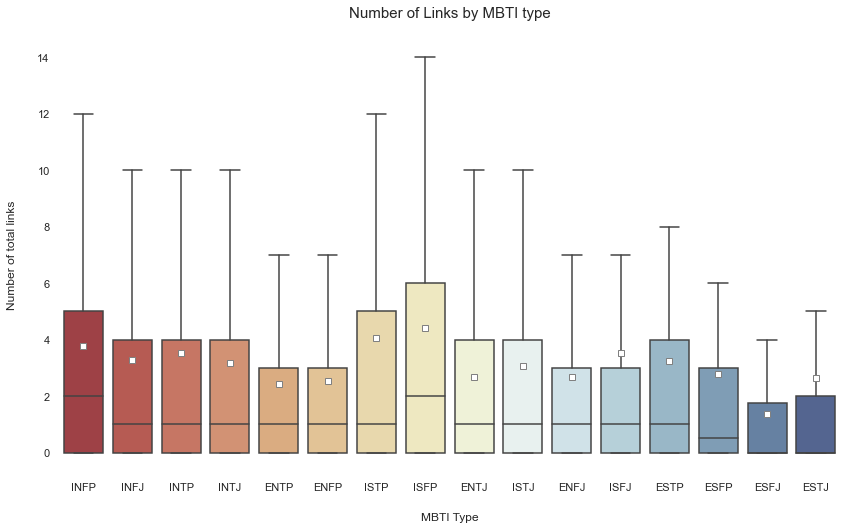

In [388]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='num_of_links', data=df, order=sorter, showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="num_of_links", data=df_no_outliers, color='k', alpha=0.3, order=sorter)

plt.title('Number of Links by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of total links', labelpad=20)

plt.savefig('Figures/Boxplot_Num_Links_types.png', dpi=300)

plt.show()

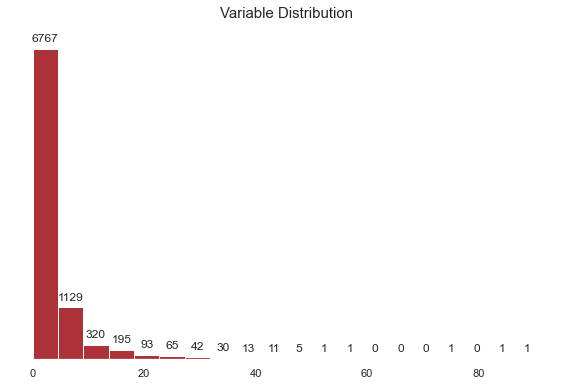

In [406]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.num_of_links, density=False, bins=20)
ax.axes.get_yaxis().set_visible(False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [390]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['num_of_links']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 83.11686593674852
P-Value: 1.8718416032844887e-11
Reject NULL hypothesis - Significant differences exist between groups.


**Post hoc Dunn's Adjustment**

In [391]:
import scikit_posthocs as sp
dunn = sp.posthoc_dunn(list_array, p_adjust='bonferroni', sort=False)

In [392]:
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')

In [393]:
def color_dunn(val):
    if val < 0.05 and val != -1:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [394]:
#dunn = dunn.mask(np.triu(np.ones(dunn.shape, dtype=np.bool_)))

dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1312,1.0000,0.6185,1.0000,0.0617,1.0000,0.7553
ENFP,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6946,0.0001,1.0000,0.0060,1.0000,0.0029,1.0000,0.0993
ENTJ,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9209,1.0000,1.0000,1.0000,0.3579,1.0000,1.0000
ENTP,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0002,1.0000,0.0128,1.0000,0.0049,1.0000,0.1601
ESFJ,1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,0.3732,0.1264,0.0116,0.4406,0.0281,0.9462,0.0040,0.7514,0.0247
ESFP,1.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,0.9589,1.0000,1.0000,1.0000,0.3550,1.0000,1.0000
ESTP,1.0000,1.0000,1.0000,1.0000,0.3732,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
INFJ,1.0000,0.6946,1.0000,1.0000,0.1264,1.0000,1.0000,1.0000,-1.0000,0.7523,1.0000,1.0000,1.0000,0.9532,1.0000,1.0000


**Effect Size with Hedges' g**

In [408]:
mean = np.mean(df.num_of_links)
std = np.std(df.num_of_links)
print(mean)
print(std)

3.304438040345821
5.792522051395371


In [409]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['num_of_links'])
    mean = np.mean(df[df['type'] == mtype]['num_of_links'])
    std = np.std(df[df['type'] == mtype]['num_of_links'])
    dictionary[mtype] = [count, mean, std]
    print(f'{mtype}: Count = {count}, Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Count = 190, Mean = 2.66, Std = 5.06
ENFP: Count = 675, Mean = 2.52, Std = 4.34
ENTJ: Count = 231, Mean = 2.66, Std = 4.16
ENTP: Count = 685, Mean = 2.41, Std = 3.87
ESFJ: Count = 42, Mean = 1.36, Std = 2.31
ESFP: Count = 48, Mean = 2.77, Std = 5.41
ESTJ: Count = 39, Mean = 2.64, Std = 6.47
ESTP: Count = 89, Mean = 3.24, Std = 6.64
INFJ: Count = 1470, Mean = 3.29, Std = 5.84
INFP: Count = 1832, Mean = 3.77, Std = 6.03
INTJ: Count = 1091, Mean = 3.18, Std = 6.07
INTP: Count = 1304, Mean = 3.54, Std = 5.89
ISFJ: Count = 166, Mean = 3.53, Std = 7.23
ISFP: Count = 271, Mean = 4.42, Std = 7.21
ISTJ: Count = 205, Mean = 3.06, Std = 5.14
ISTP: Count = 337, Mean = 4.05, Std = 7.56


In [410]:
hedges = pd.DataFrame(dictionary).T

In [411]:
hedges.columns = ['Count', 'Mean', 'Std']

In [412]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,2.663158,5.062994
ENFP,675.0,2.522963,4.340745
ENTJ,231.0,2.658009,4.160202


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [413]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

5.7691129781096375

In [414]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

3.304438040345821

In [415]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [416]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,2.663158,5.062994,-0.110000
ENFP,675.000000,2.522963,4.340745,-0.140000
ENTJ,231.000000,2.658009,4.160202,-0.110000
ENTP,685.000000,2.413139,3.874318,-0.150000
ESFJ,42.000000,1.357143,2.307559,-0.340000
ESFP,48.000000,2.770833,5.413100,-0.090000
ESTJ,39.000000,2.641026,6.466827,-0.110000
ESTP,89.000000,3.235955,6.641752,-0.010000
INFJ,1470.000000,3.293878,5.837426,-0.000000
INFP,1832.000000,3.771288,6.032715,0.080000


<br>
<br>

### Use of emojis

***

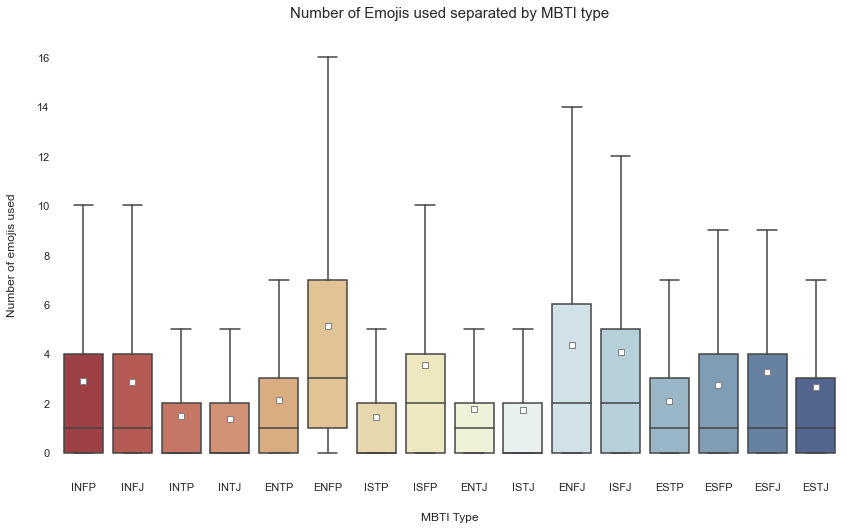

In [230]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='Total_Emojis', data=df, order=sorter, showmeans=True, showfliers=False,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="Total_Emojis", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Number of Emojis used separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of emojis used', labelpad=20)

plt.savefig('Figures/Boxplot_Use_Emojis_type.png', dpi=300)

plt.show()

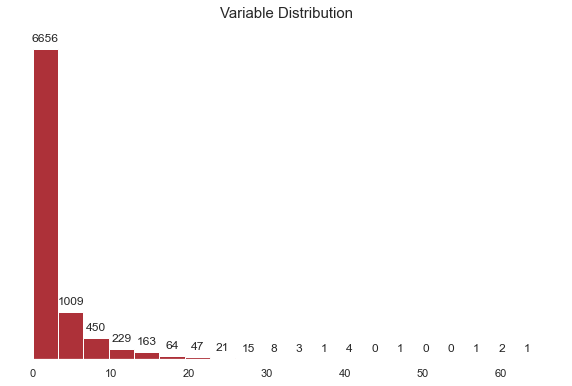

In [417]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.Total_Emojis, density=False, bins=20)
ax.axes.get_yaxis().set_visible(False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [418]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['Total_Emojis']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 592.3664819198334
P-Value: 1.48548010596758e-116
Reject NULL hypothesis - Significant differences exist between groups.


**Post hoc Dunn's Adjustment**

In [419]:
import scikit_posthocs as sp
dunn = sp.posthoc_dunn(list_array, p_adjust='bonferroni', sort=False)

In [420]:
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')

In [421]:
def color_dunn(val):
    if val < 0.05 and val != -1:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [422]:
#dunn = dunn.mask(np.triu(np.ones(dunn.shape, dtype=np.bool_)))

dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,-1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0412,0.1419,0.1226,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000
ENFP,1.0000,-1.0000,0.0000,0.0000,0.5829,0.9983,0.9957,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0612,0.0000,0.0000
ENTJ,0.0000,0.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0016,0.0013,1.0000,1.0000,0.0000,0.0003,1.0000,1.0000
ENTP,0.0000,0.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,0.0003,0.0001,0.0001,0.0002,0.0000,0.0004,1.0000,0.0692
ESFJ,1.0000,0.5829,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESFP,1.0000,0.9983,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,0.3949,0.5571,1.0000,1.0000,1.0000,0.7752
ESTJ,1.0000,0.9957,1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,0.0412,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,0.1278,0.9143,1.0000,1.0000
INFJ,0.1419,0.0000,0.0016,0.0003,1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,0.0000,0.0000,0.8630,1.0000,0.0003,0.0000


**Effect Size with Hedges' g**

In [423]:
mean = np.mean(df.Total_Emojis)
std = np.std(df.Total_Emojis)
print(mean)
print(std)

2.544207492795389
4.38624778334388


In [424]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['Total_Emojis'])
    mean = np.mean(df[df['type'] == mtype]['Total_Emojis'])
    std = np.std(df[df['type'] == mtype]['Total_Emojis'])
    dictionary[mtype] = [count, mean, std]
    print(f'{mtype}: Count = {count}, Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Count = 190, Mean = 4.37, Std = 6.08
ENFP: Count = 675, Mean = 5.11, Std = 7.18
ENTJ: Count = 231, Mean = 1.76, Std = 3.02
ENTP: Count = 685, Mean = 2.12, Std = 3.48
ESFJ: Count = 42, Mean = 3.26, Std = 5.87
ESFP: Count = 48, Mean = 2.73, Std = 3.61
ESTJ: Count = 39, Mean = 2.64, Std = 3.99
ESTP: Count = 89, Mean = 2.08, Std = 3.42
INFJ: Count = 1470, Mean = 2.83, Std = 4.17
INFP: Count = 1832, Mean = 2.91, Std = 4.33
INTJ: Count = 1091, Mean = 1.37, Std = 2.57
INTP: Count = 1304, Mean = 1.47, Std = 3.31
ISFJ: Count = 166, Mean = 4.05, Std = 5.51
ISFP: Count = 271, Mean = 3.52, Std = 5.91
ISTJ: Count = 205, Mean = 1.73, Std = 3.4
ISTP: Count = 337, Mean = 1.45, Std = 2.87


In [425]:
hedges = pd.DataFrame(dictionary).T

In [426]:
hedges.columns = ['Count', 'Mean', 'Std']

In [427]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,4.368421,6.075928
ENFP,675.0,5.112593,7.177273
ENTJ,231.0,1.757576,3.015418


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [428]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

4.2528944521909215

In [429]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

2.544207492795389

In [430]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [431]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,4.368421,6.075928,0.430000
ENFP,675.000000,5.112593,7.177273,0.600000
ENTJ,231.000000,1.757576,3.015418,-0.180000
ENTP,685.000000,2.115328,3.477958,-0.100000
ESFJ,42.000000,3.261905,5.871884,0.170000
ESFP,48.000000,2.729167,3.609822,0.040000
ESTJ,39.000000,2.641026,3.990291,0.020000
ESTP,89.000000,2.078652,3.419129,-0.110000
INFJ,1470.000000,2.834694,4.172377,0.070000
INFP,1832.000000,2.910480,4.327562,0.090000


<br>
<br>

### Mentions

***

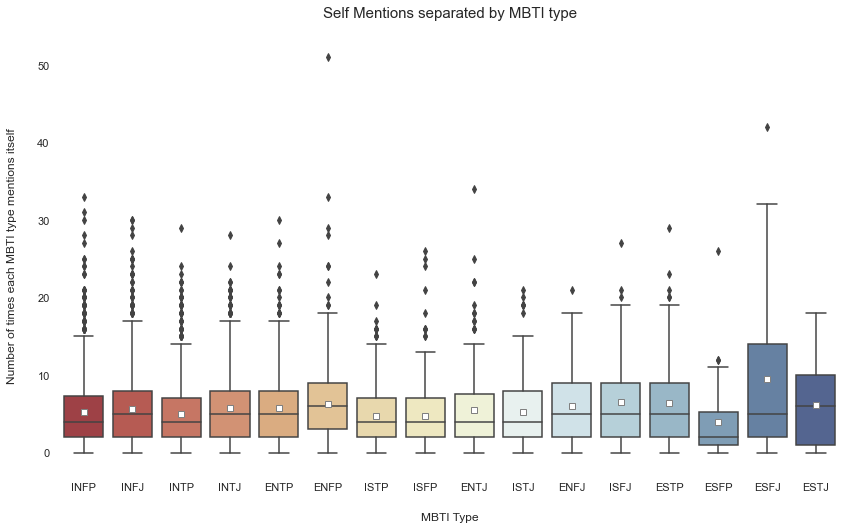

In [58]:
plt.figure(figsize=(14,8))

sns.set_palette(sns.color_palette(list(colors_types.values())))
sns.boxplot(x='type',y='self_mentions', data=df, order=sorter, showmeans=True, showfliers=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
#sns.swarmplot(x='type', y="Total_Emojis", data=df, color='k', alpha=0.3, order=sorter)

plt.title('Self Mentions separated by MBTI type', size=15, pad=20)
plt.xlabel('MBTI Type', labelpad=20)
plt.ylabel('Number of times each MBTI type mentions itself', labelpad=20)

plt.savefig('Figures/self_mentions_by_type.png', dpi=300)

plt.show()

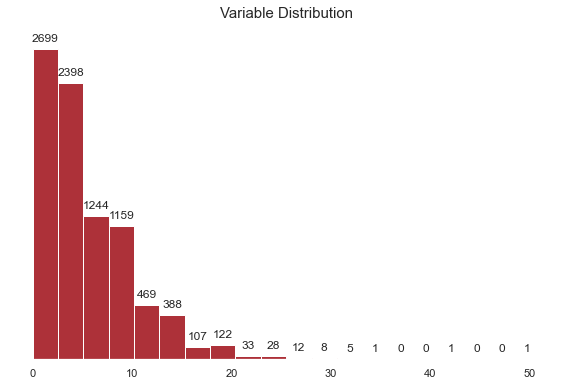

In [433]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.self_mentions, density=False, bins=20)
ax.axes.get_yaxis().set_visible(False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    
plt.title('Variable Distribution', pad = 15, size = 15)
plt.show()

In [434]:
list_array = []

for mtype in mbti_types:
    
    result = df[df['type'] == mtype]['self_mentions']
    list_array.append(result)
    
H, pval = stats.kruskal(list_array[0],list_array[1],list_array[2],list_array[3],
                       list_array[4],list_array[5],list_array[6],list_array[7],
                       list_array[8],list_array[9],list_array[10],list_array[11],
                       list_array[12],list_array[13],list_array[14],list_array[15])
    
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 97.00434932573404
P-Value: 4.8090704472222525e-14
Reject NULL hypothesis - Significant differences exist between groups.


**Post hoc Dunn's Adjustment**

In [435]:
import scikit_posthocs as sp
dunn = sp.posthoc_dunn(list_array, p_adjust='bonferroni', sort=False)

In [436]:
dunn.columns = mbti_types
dunn['types'] = mbti_types
dunn = dunn.set_index('types')

In [437]:
def color_dunn(val):
    if val < 0.05 and val != -1:
        color = 'lightgreen'
        return 'background-color: %s' % color
    else:
        color = None
        return 'background-color: %s' % color

In [438]:
#dunn = dunn.mask(np.triu(np.ones(dunn.shape, dtype=np.bool_)))

dunn = dunn.round(4)
dunn.style.set_precision(4).applymap(color_dunn)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
types,,,,,,,,,,,,,,,,
ENFJ,-1.0000,1.0000,1.0000,1.0000,1.0000,0.0447,1.0000,1.0000,1.0000,1.0000,1.0000,0.3445,1.0000,0.4768,1.0000,0.8007
ENFP,1.0000,-1.0000,0.1568,1.0000,1.0000,0.0008,1.0000,1.0000,0.0066,0.0000,0.1355,0.0000,1.0000,0.0000,0.0818,0.0000
ENTJ,1.0000,0.1568,-1.0000,1.0000,1.0000,0.8367,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ENTP,1.0000,1.0000,1.0000,-1.0000,1.0000,0.0400,1.0000,1.0000,1.0000,0.4005,1.0000,0.0055,1.0000,0.1375,1.0000,0.2244
ESFJ,1.0000,1.0000,1.0000,1.0000,-1.0000,0.1368,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESFP,0.0447,0.0008,0.8367,0.0400,0.1368,-1.0000,1.0000,0.1515,0.1121,0.6832,0.0596,1.0000,0.0121,1.0000,1.0000,1.0000
ESTJ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
ESTP,1.0000,1.0000,1.0000,1.0000,1.0000,0.1515,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
INFJ,1.0000,0.0066,1.0000,1.0000,1.0000,0.1121,1.0000,1.0000,-1.0000,1.0000,1.0000,0.0226,1.0000,0.6736,1.0000,1.0000


**Effect Size with Hedges' g**

In [439]:
mean = np.mean(df.self_mentions)
std = np.std(df.self_mentions)
print(mean)
print(std)

5.477694524495678
4.710016720669916


In [440]:
dictionary = {}

for mtype in mbti_types:
    count = len(df[df['type'] == mtype]['self_mentions'])
    mean = np.mean(df[df['type'] == mtype]['self_mentions'])
    std = np.std(df[df['type'] == mtype]['self_mentions'])
    dictionary[mtype] = [count, mean, std]
    print(f'{mtype}: Count = {count}, Mean = {round(mean,2)}, Std = {round(std,2)}')

ENFJ: Count = 190, Mean = 6.05, Std = 4.83
ENFP: Count = 675, Mean = 6.32, Std = 4.92
ENTJ: Count = 231, Mean = 5.48, Std = 5.06
ENTP: Count = 685, Mean = 5.73, Std = 4.59
ESFJ: Count = 42, Mean = 9.55, Std = 10.33
ESFP: Count = 48, Mean = 3.88, Std = 4.76
ESTJ: Count = 39, Mean = 6.15, Std = 5.37
ESTP: Count = 89, Mean = 6.37, Std = 5.74
INFJ: Count = 1470, Mean = 5.6, Std = 4.76
INFP: Count = 1832, Mean = 5.21, Std = 4.53
INTJ: Count = 1091, Mean = 5.73, Std = 4.71
INTP: Count = 1304, Mean = 4.94, Std = 4.35
ISFJ: Count = 166, Mean = 6.49, Std = 5.29
ISFP: Count = 271, Mean = 4.75, Std = 4.36
ISTJ: Count = 205, Mean = 5.27, Std = 4.61
ISTP: Count = 337, Mean = 4.77, Std = 4.0


In [441]:
hedges = pd.DataFrame(dictionary).T

In [442]:
hedges.columns = ['Count', 'Mean', 'Std']

In [443]:
hedges.head(3)

,Count,Mean,Std
ENFJ,190.0,6.047368,4.834402
ENFP,675.0,6.315556,4.922178
ENTJ,231.0,5.484848,5.061397


[Pooled Standard Deviation](http://goldbook.iupac.org/terms/view/P04758)

In [444]:
items = []

for i in hedges.iterrows():
    
    result = ((i[1][0]-1)*(i[1][2]**2))
    items.append(result)

pooled_std = np.sqrt((sum(items)) / (hedges.Count.sum() - len(hedges.Count)))
pooled_std

4.677205329809374

In [445]:
items = []

for i in hedges.iterrows():
    result = i[1][0]*i[1][1]
    items.append(result)

pooled_mean = sum(items) / (hedges.Count.sum())
pooled_mean

5.477694524495678

In [446]:
hedges['hedges_g'] = list(map(lambda x : round((x - pooled_mean)/pooled_std,2), hedges['Mean']))

In [447]:
hedges
hedges.style.applymap(color_rgy, subset=pd.IndexSlice['hedges_g'])

,Count,Mean,Std,hedges_g
ENFJ,190.000000,6.047368,4.834402,0.120000
ENFP,675.000000,6.315556,4.922178,0.180000
ENTJ,231.000000,5.484848,5.061397,0.000000
ENTP,685.000000,5.729927,4.586084,0.050000
ESFJ,42.000000,9.547619,10.326117,0.870000
ESFP,48.000000,3.875000,4.763686,-0.340000
ESTJ,39.000000,6.153846,5.366269,0.140000
ESTP,89.000000,6.370787,5.736503,0.190000
INFJ,1470.000000,5.597959,4.756620,0.030000
INFP,1832.000000,5.212336,4.525305,-0.060000


<br>
<br>

### A more comprehensive view of the self-mentions and the mentions to other types

***

In [64]:
totals = df.groupby('type').Total_Mentions.sum()

In [65]:
df_mentions = df.iloc[:,13:29]
columns = df_mentions.columns.to_list()
df_mentions.columns = [re.sub(r'\_.*$','',s) for s in columns]
df_mentions = df_mentions.join(df['type'])
df_mentions = df_mentions.groupby('type').sum()
df_mentions.sort_index(axis=1, inplace=True)
names = df_mentions.columns

In [66]:
df_mentions.sum(axis=1)

type
ENFJ     3257
ENFP    11953
ENTJ     4051
ENTP    11698
ESFJ     1054
ESFP      864
ESTJ      741
ESTP     1896
INFJ    21607
INFP    23080
INTJ    15230
INTP    16531
ISFJ     2823
ISFP     4450
ISTJ     2714
ISTP     4003
dtype: int64

In [67]:
df_percentages = df_mentions.div(totals, axis=0)

In [68]:
df_percentages.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
type,,,,,,,,,,,,,,,,
ENFJ,0.352779,0.064784,0.030396,0.024255,0.027633,0.021492,0.015966,0.019343,0.101013,0.109917,0.067547,0.046976,0.018422,0.019036,0.042063,0.038379
ENFP,0.037313,0.356647,0.032460,0.060403,0.022839,0.028612,0.018238,0.022087,0.068351,0.080482,0.099808,0.038651,0.024011,0.025600,0.044926,0.039572
ENTJ,0.039250,0.055295,0.312762,0.060973,0.024438,0.027401,0.034806,0.029869,0.048383,0.062454,0.108615,0.071094,0.027647,0.034806,0.031103,0.031103
ENTP,0.024962,0.071978,0.043512,0.335527,0.027868,0.021371,0.020944,0.039836,0.079330,0.053941,0.078304,0.083775,0.032313,0.029321,0.030774,0.026244
ESFJ,0.035104,0.045541,0.019924,0.048387,0.380455,0.030361,0.030361,0.013283,0.038899,0.051233,0.052182,0.111954,0.046490,0.049336,0.024668,0.021822


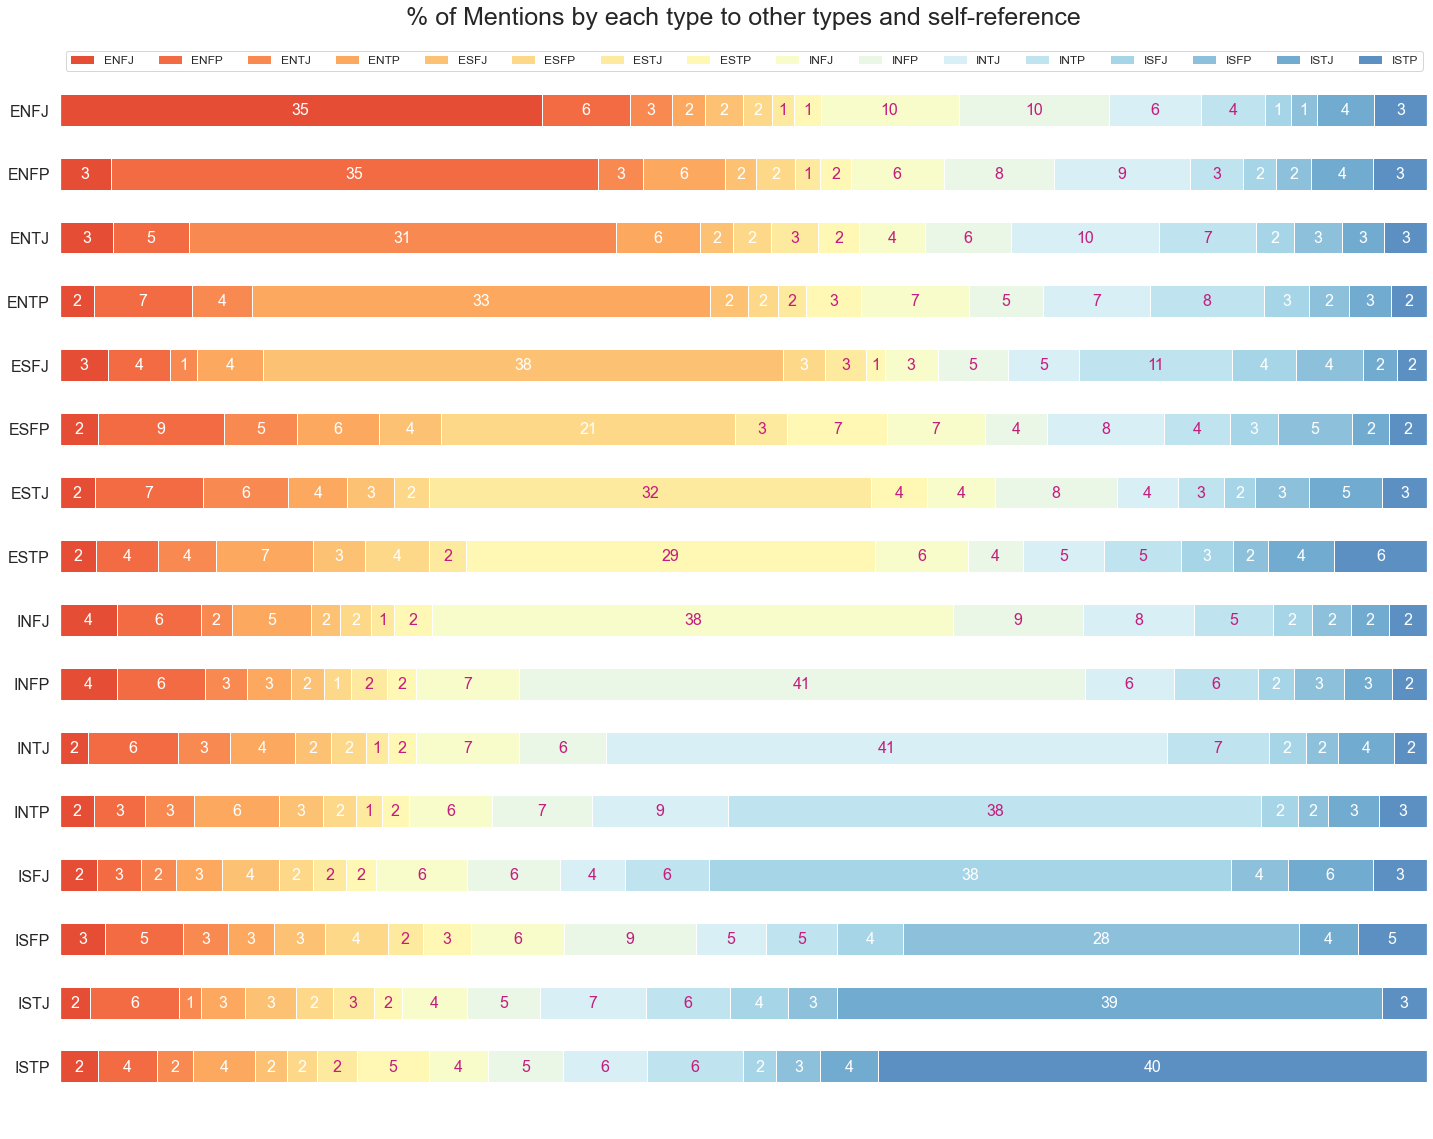

In [69]:
results = df_percentages.T.to_dict('list')
category_names = df_percentages.columns


labels = list(results.keys())
data = np.array(list(results.values()))
data = data*100
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlBu')(
    np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(24.5, 20))
ax.invert_yaxis()
ax.set_yticklabels(category_names,fontsize=16)
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else '#c41e7c'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), fontsize=16, ha='center', va='center',
                color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='upper left', fontsize='medium', facecolor=None)

plt.title('% of Mentions by each type to other types and self-reference', size=25, pad=20)

plt.show()
fig.savefig('Figures/mentions.png', dpi=300)

<br>
Seems interesting that the SPs have a lower self-metioning percentage in general, let's check this same data for Kersey's temperaments 

In [70]:
df_keirsey = df.groupby('keirsey').sum().iloc[:,12:28]

In [71]:
totals = df.groupby('keirsey').Total_Mentions.sum()

In [72]:
totals

keirsey
NF    59897
NT    47510
SJ     7332
SP    11213
Name: Total_Mentions, dtype: int64

In [73]:
df_keirsey_pct = df_keirsey.div(totals, axis=0)

In [74]:
df_keirsey_pct.sum(axis=1)

keirsey
NF    1.0
NT    1.0
SJ    1.0
SP    1.0
dtype: float64

In [75]:
new_column_names = ['NF', 'NT', 'NT', 'NT','NT', 'NF', 'NF', 'NF','SP', 'SP', 'SJ', 'SJ','SP', 'SP', 'SJ', 'SJ']

In [76]:
df_keirsey_pct.columns = new_column_names

In [77]:
df_keirsey_pct = df_keirsey_pct.groupby(lambda x:x, axis=1).sum()

In [78]:
plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.85, data.shape[1]))

array([[0.89888504, 0.30549789, 0.20676663, 1.        ],
       [0.95240292, 0.41806997, 0.25843906, 1.        ],
       [0.97208766, 0.53740869, 0.31349481, 1.        ],
       [0.98869666, 0.65736255, 0.36885813, 1.        ],
       [0.99361784, 0.75540177, 0.44905805, 1.        ],
       [0.99546328, 0.84767397, 0.53579393, 1.        ],
       [0.99730873, 0.91657055, 0.6225298 , 1.        ],
       [0.99915417, 0.97377932, 0.70926567, 1.        ],
       [0.97377932, 0.98985006, 0.79723183, 1.        ],
       [0.91657055, 0.96770473, 0.90242215, 1.        ],
       [0.84582853, 0.93694733, 0.9633218 , 1.        ],
       [0.74801999, 0.88896578, 0.93564014, 1.        ],
       [0.64944252, 0.83406382, 0.90449827, 1.        ],
       [0.5479431 , 0.75286428, 0.86020761, 1.        ],
       [0.44767397, 0.6698193 , 0.81514802, 1.        ],
       [0.3609381 , 0.56647443, 0.76163014, 1.        ]])

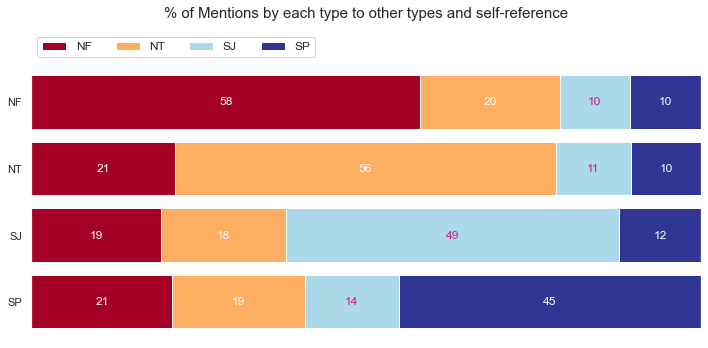

In [79]:
results = df_keirsey_pct.T.to_dict('list')
category_names = df_keirsey_pct.columns


labels = list(results.keys())
data = np.array(list(results.values()))
data = data*100
data_cum = data.cumsum(axis=1)
category_colors = colors_keirsey_rgb_pct.values() 

fig, ax = plt.subplots(figsize=(10, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.8,
            label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else '#c41e7c'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center',
                color=text_color)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium', facecolor='white')

plt.title('% of Mentions by each type to other types and self-reference', size=15, pad=45)
plt.tight_layout()

plt.show()
fig.savefig('Figures/keirsey_mentions.png', dpi=300)


Apparently the focus is more on the "NFs" and "NTs" rather than the "SPs" and "SJs"